b= 1.0e-07 χ/λ= 0.202
b= 2.0e-07 χ/λ= 0.202
b= 3.0e-07 χ/λ= 0.202
b= 4.0e-07 χ/λ= 0.202
b= 5.0e-07 χ/λ= 0.202
b= 6.0e-07 χ/λ= 0.202
b= 7.0e-07 χ/λ= 0.202
b= 8.0e-07 χ/λ= 0.202
b= 9.0e-07 χ/λ= 0.202
b= 1.0e-06 χ/λ= 0.202
b= 2.0e-06 χ/λ= 0.202
b= 3.0e-06 χ/λ= 0.202
b= 4.0e-06 χ/λ= 0.202
b= 5.0e-06 χ/λ= 0.202
b= 6.0e-06 χ/λ= 0.202
b= 7.0e-06 χ/λ= 0.202
b= 8.0e-06 χ/λ= 0.202
b= 9.0e-06 χ/λ= 0.202
b= 1.0e-05 χ/λ= 0.202
b= 2.0e-05 χ/λ= 0.202
b= 3.0e-05 χ/λ= 0.202
b= 4.0e-05 χ/λ= 0.202
b= 5.0e-05 χ/λ= 0.201
b= 6.0e-05 χ/λ= 0.201
b= 7.0e-05 χ/λ= 0.201
b= 8.0e-05 χ/λ= 0.201
b= 9.0e-05 χ/λ= 0.201
λ_0= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
 s_dec_list= [3.51225207e-09 1.40490082e-08 3.16102685e-08 5.61960328e-08
 8.78063012e-08 1.26441074e-07 1.72100350e-07 2.24784131e-07
 2.84492416e-07 3.51141857e-07 1.40456743e-06 3.16027671e-06
 5.61693616e-06

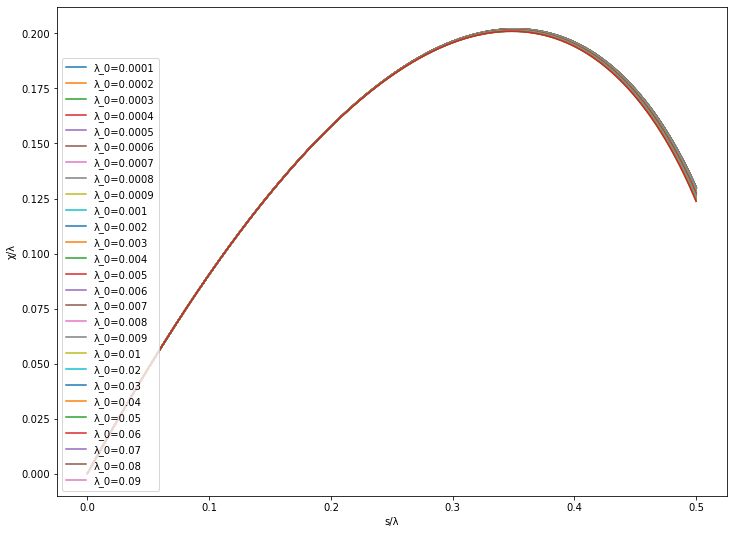

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math


plt.figure(figsize=(12, 9))

π=3.14
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) #eq.(57) in reference pdf "PBH binary".
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)

λ_3_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001, 0.002, 0.003, 0.004,
          0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for λ_0 in λ_3_list:
    def s_dec(λ_0):
        def f(u,s,λ_0):
             return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]
        separation0= [1e-12,1]
        b= λ_0/1000
        ss= np.linspace(1e-12,((1.5*λ_0)/3),6000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        
        Bs_max=np.max(Bs)
        s_max=ss[np.argmax(Bs)]
        s_dec=(λ_0*s_max)
        print("b=",'%.1e'% b,"χ/λ=",'%.3f'%Bs_max)
        plt.plot(As,Bs,'')
        plt.xlabel("s/λ")
        plt.ylabel("χ/λ")
        plt.plot(As,Bs,'')
        labels=["λ_0=0.0001","λ_0=0.0002","λ_0=0.0003","λ_0=0.0004","λ_0=0.0005","λ_0=0.0006",
                    "λ_0=0.0007","λ_0=0.0008","λ_0=0.0009","λ_0=0.001","λ_0=0.002","λ_0=0.003","λ_0=0.004",
                    "λ_0=0.005","λ_0=0.006","λ_0=0.007","λ_0=0.008","λ_0=0.009","λ_0=0.01","λ_0=0.02",
                    "λ_0=0.03","λ_0=0.04","λ_0=0.05","λ_0=0.06","λ_0=0.07","λ_0=0.08","λ_0=0.09"]
        plt.legend(labels,loc="lower left")
        λ_0+=0.0001
        return s_dec

    
    
    
s_dec_list=np.zeros(len(λ_3_list))
for i, λ_0 in enumerate(λ_3_list):
      s_dec_list[i]= (s_dec(λ_0))
        
def M_r(s):    #eq.(43) in reference pdf "PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s) 
M_r_list=np.zeros(len(s_dec_list)) 
for i, s in enumerate(s_dec_list):
     M_r_list[i] = M_r(s)
    
        
print("λ_0=",λ_3_list)
print(" s_dec_list=", s_dec_list)          
print("M_r=",M_r_list)
plt.show()   

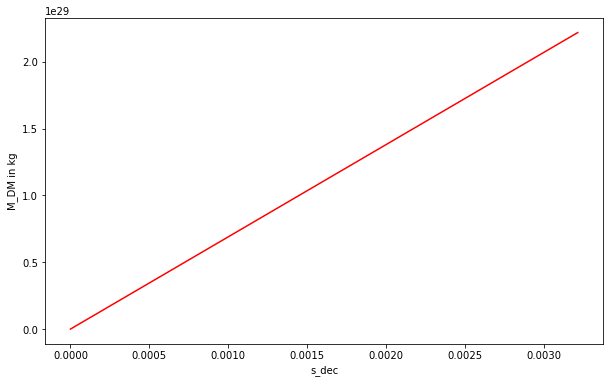

In [16]:
plt.figure(figsize=(10,6))
plt.plot(s_dec_list,M_r_list,'r')
plt.xlabel('s_dec')
plt.ylabel('M_DM in kg')
plt.show()

b= 2.0e-06 χ/λ= 0.369
b= 3.0e-06 χ/λ= 0.573
b= 4.0e-06 χ/λ= 0.790
b= 5.0e-06 χ/λ= 1.018
b= 6.0e-06 χ/λ= 1.257
b= 7.0e-06 χ/λ= 1.506
λ_0= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
s_dec= [0.36910949 0.85996977 1.57942937 2.54428392 3.77031896 5.27239628]
M_DM= [2.41385973e+31 5.31845394e+31 9.17341324e+31 1.38624080e+32
 1.93059253e+32 2.54510589e+32]


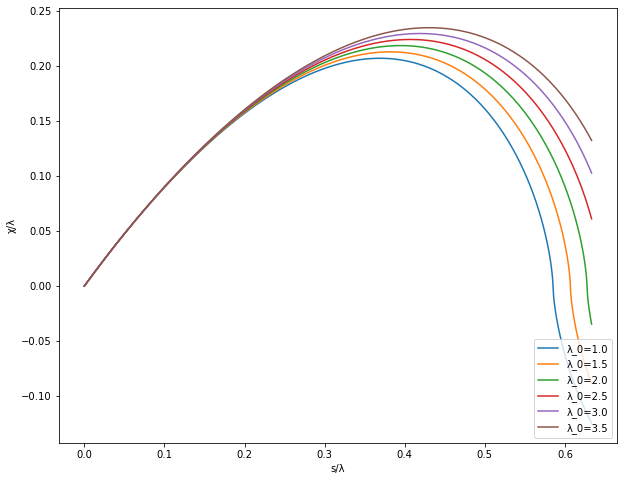

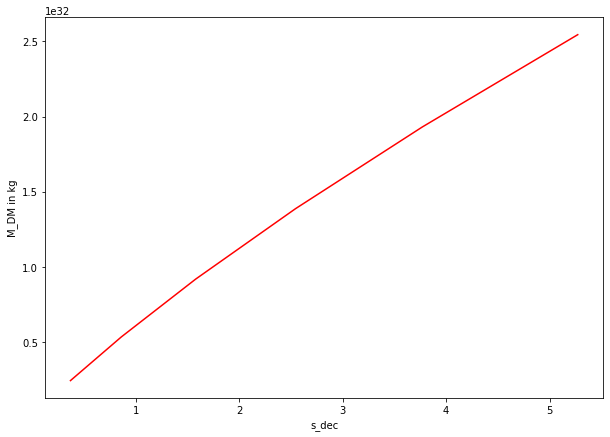

In [13]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping later around matter-radiation equality using eqs.(42) & (47) in reference 
# pdf "PBH binary" .

plt.figure(figsize=(10, 8))

def h(x):
    return math.sqrt((x**-3)+(x**-4))   
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                    #eq.(56) in reference pdf "PBH binary".

def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_4_list=[1.0,1.5,2.0,2.5,3.0,3.5]
for λ_0 in λ_4_list:
    def s_dec(λ_0):
        def f(n,p,λ_0):
            return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*λ(p)
            *((n[0]**2+b**2)**(3/2))))]      #eq.(47) in reference pdf "PBH binary".
        z0= [1e-12,1]
        b= ((2*λ_0)/1000000)
        ps= np.linspace(1e-12,(1.9*λ_0/3),10000000) 
        ns= odeint(f,z0,ps,args=(λ_0,))
        zs= ns[:,0]
        Ps=ps/λ_0
        Zs=zs/λ_0
        χ_max=np.max(Zs)
        s_max = ps[np.argmax(Zs)]
        s_max=ps[np.argmax(Zs)]
        s_dec=(λ_0*s_max)
        print("b=",'%.1e'% b,"χ/λ=",'%.3f'%s_max)
        plt.plot(Ps,Zs,'')
        labels=["λ_0=1.0","λ_0=1.5","λ_0=2.0","λ_0=2.5","λ_0=3.0","λ_0=3.5"]
        plt.legend(labels,loc="lower right")
        plt.xlabel("s/λ")
        plt.ylabel("χ/λ")
        λ_0+=0.5
        return  s_dec
        
s_dec_list=np.zeros(len(λ_4_list))

for i, λ_0 in enumerate(λ_4_list):
     s_dec_list[i] = (s_dec(λ_0))
print("λ_0=",λ_4_list)
print("s_dec=",s_dec_list)


def M(s):               #eq.(42) in reference pdf "PBH binary".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))
                  +(4/3)))
                                                                                
                                                                               
M_list=np.zeros(len(s_dec_list)) 
for i, s in enumerate(s_dec_list):
     M_list[i] = M(s)
print("M_DM=",M_list)
plt.figure(figsize=(10,7))
plt.plot(s_dec_list, M_list,'r')
plt.xlabel('s_dec')
plt.ylabel('M_DM in kg')
plt.show() 